# Pset 6 - Sports and Canons

### --- The Way We Like It ---

#### Jake Richter 

---

## Problem 1 - Terminal Velocity 

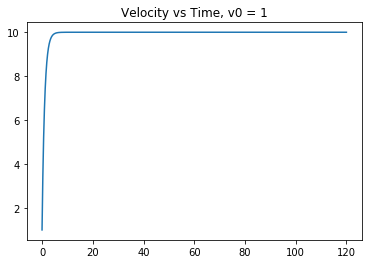

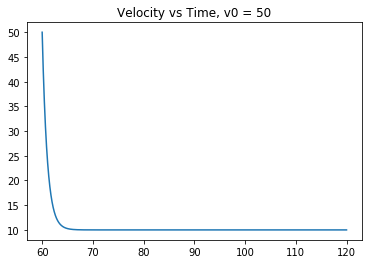

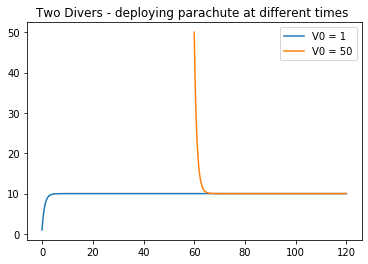

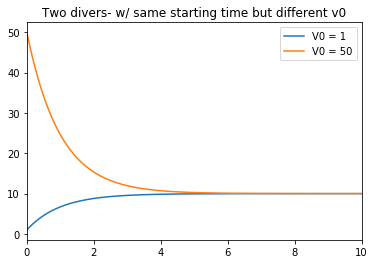

In [40]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import sin, cos 


def f(v,t, b):
    a = 10.0 
    b= 1
    return (a - b*v)

def Euler_Method(function,N,t0, tf,v0,b,plot):
    h = (tf - t0)/N
    time = np.arange(t0,tf,h)
    v = v0
    vp = np.empty(len(time))
    
    for i, t in enumerate(time): 
        vp[i] = v
        v += h*function(v,t,b)
    vtit = str(v0)
    if plot == True:
        
        plt.figure()
        plt.title('Velocity vs Time, v0 = '+vtit)
        plt.plot(time,vp)
        plt.show()
    
    return time, vp, h, vtit
    

t1, v1, h, vtit1 = Euler_Method(f,10000,0,120,1,1,True)
t2, v2, h2, vtit2 = Euler_Method(f,10000,60,120,50,1,True)
t3, v3, h3, vtit3 = Euler_Method(f,10000,0,120,50,1,False)

plt.figure()
plt.title('Two Divers - deploying parachute at different times ')
plt.plot(t1,v1, label = 'V0 = '+vtit1 )
plt.plot(t2,v2, label = 'V0 = '+vtit2)
plt.legend()
plt.show()

plt.figure()
plt.title('Two divers- w/ same starting time but different v0')
plt.plot(t1,v1, label = 'V0 = '+vtit1 )
plt.plot(t3,v3, label = 'V0 = '+vtit3)
plt.xlim(0,10)
plt.legend()
plt.show()

---

## Problem 6.2 - Coupled Radioactive Decay

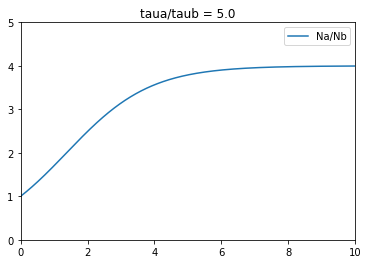

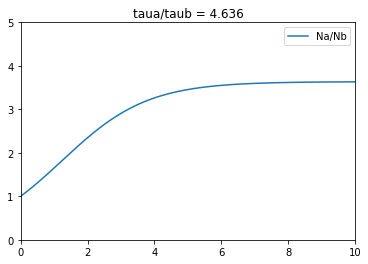

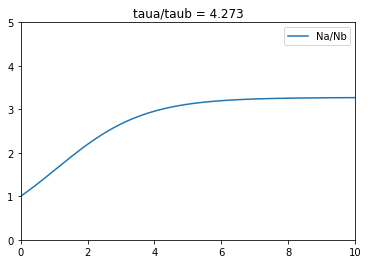

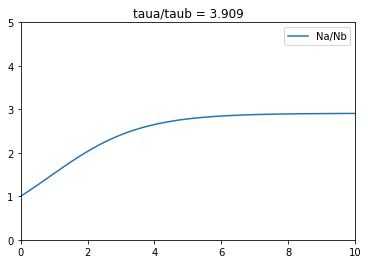

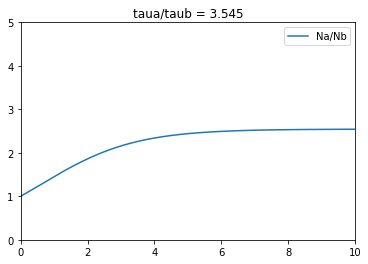

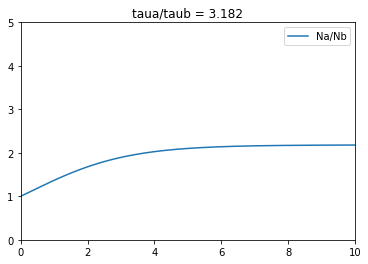

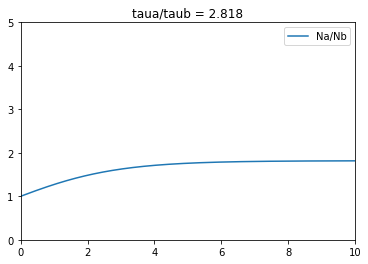

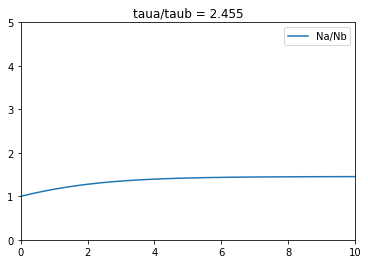

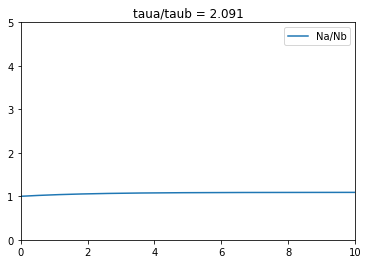

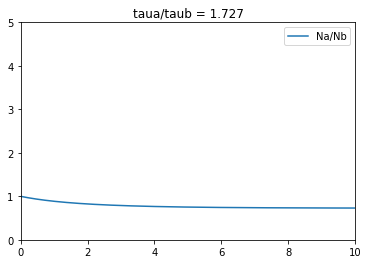

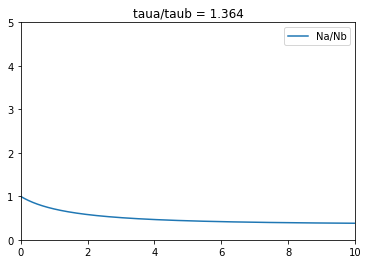

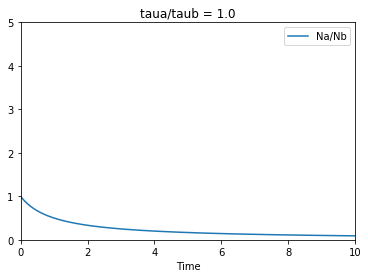

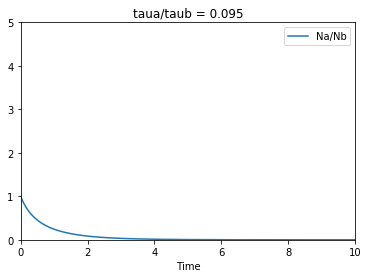

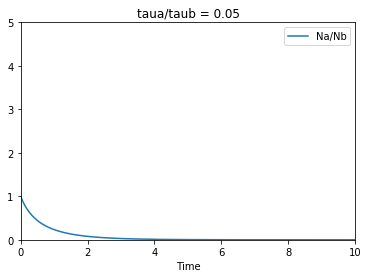

In [56]:
import numpy as np 
from numpy import sqrt, sin, cos
import matplotlib.pyplot as plt


def F2(r,t,taua,taub):
    r = np.array(r)
    
    Na = r[0]
    Nb = r[1]
    
    
    f1 = -Na/taua
    f2 = -f1 - Nb/taub
    
    
    return np.array([f1,f2])


def Numerical_DE(fs,t0,tf,N,x0,y0,taua,taub):
    
    
    h = (tf-t0)/N                               # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h)                   # creating the time steps
    r = np.empty((len(time),2),dtype = float)   # intializing x, y 
    
    r[0][0] = x0
    r[0][1] = y0
    # r[0][2] = v0*cos(theta0*pi/180)
    # r[0][3] = v0*sin(theta0*pi/180)
    
    for c,t in enumerate(time):                 # to animate - go through this for loop to get the updated pos/velocity 
                                                                                            
        if c == N-1:
            break 
        else :
            k1 = h*fs(r[c,:],t,taua,taub)
            k2 = h*fs(r[c,:] + half*k1, t + half*h, taua, taub)
            k3 = h*fs(r[c,:] + half*k2, t + half*h, taua, taub)
            k4 = h*fs(r[c,:] + k3, t + h, taua, taub)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)

    
    
    xl = r[:,0]
    yl = r[:,1]
    
    
    '''
    plt.figure()

    plt.plot(xl,yl)
    plt.xlim(0,250)
    plt.ylim(0,100)

    plt.show()
    '''
    return time,xl, yl
# Creating the proper intial tau values 
    
tauas = np.linspace(1,5,12)
taubs = np.linspace(1,20,3)

# Initial Conditions 
na0 = 100
nb0 = 100

# Number of iteration points per tau values
Npoints = 1000
# time conditions
t0 = 0.0 
tf = 10



# Iterating through the taus to teest their interatic

for i in range(1,len(tauas)):
    plt.figure()
    times, Na, Nb = Numerical_DE(F2,t0,tf,Npoints,na0,nb0,tauas[-i],taubs[0])
    plt.title('taua/taub = ' + str(np.around(tauas[-i]/taubs[0],3)))
    plt.plot(times, Na/Nb, label = 'Na/Nb')
    # plt.plot(times,Nb, label = 'Nb ')
    plt.xlim(0,10)
    plt.ylim(0,5)
    plt.legend()
plt.show()
    

for tb in taubs:
    plt.figure()
    times, Na, Nb = Numerical_DE(F2,t0,tf,Npoints,na0,nb0,tauas[0],tb)
    plt.title('taua/taub = ' + str(np.around(tauas[0]/tb,3)))
    plt.plot(times, Na/Nb, label = 'Na/Nb')
    # plt.plot(times,Nb, label = 'Nb ')


    plt.xlabel('Time')
    plt.xlim(0,10)
    plt.ylim(0,5)
    plt.legend()
plt.show()



Here we can see the gradual shift in the proportion of Na/Nb changes as the ratio between their $\tau$'s change

---

## Problem 6.3 - Canons 

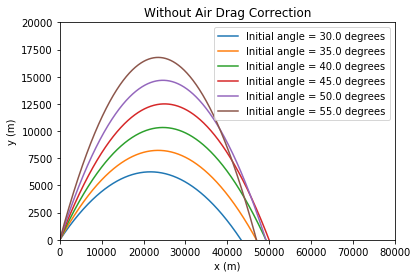

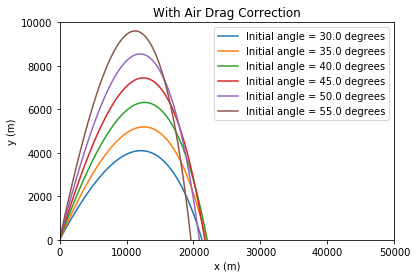

In [59]:


import numpy as np
from numpy import pi, sin, sqrt, cos 
import matplotlib.pyplot as plt 

def fun(r,t,m):
    r = np.array(r)
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    b2 = 4e-5
    g = 9.81
    t2 = sqrt(vx*vx + vy*vy)
    
    f1 = vx
    f2 = vy
    f3 = - vx * b2*t2
    f4 = -g - vy*b2*t2
    return np.array([f1,f2,f3,f4])

def f(r,t,m):
    r = np.array(r)
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    g = 9.8
    
    
    
    f1 = vx
    f2 = vy
    f3 = 0.0
    f4 = - g 
    return np.array([f1,f2,f3,f4])

def Numerical_DE(fs,t0,tf,N,x0,y0,v0,theta0,m):
    
    
    h = (tf-t0)/N                               # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h)                   # creating the time steps
    r = np.empty((len(time),4),dtype = float)   # intializing x, y 
    
    r[0][0] = x0
    r[0][1] = y0
    r[0][2] = v0*cos(theta0*pi/180)
    r[0][3] = v0*sin(theta0*pi/180)
    
    for c,t in enumerate(time):                 # to animate - go through this for loop to get the updated pos/velocity 
                                                                                            
        if c == N-1:
            break 
        else :
            k1 = h*fs(r[c,:],t,m)
            k2 = h*fs(r[c,:] + half*k1, t + half*h,m)
            k3 = h*fs(r[c,:] + half*k2, t + half*h,m)
            k4 = h*fs(r[c,:] + k3, t + h,m)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)

    
    
    xl = r[:,0]
    yl = r[:,1]
    
    
    '''
    plt.figure()
    plt.plot(xl,yl)
    plt.xlim(0,250)
    plt.ylim(0,100)
    plt.show()
    '''
    return xl, yl
    
theta0s = np.array([30.0, 35.0, 40.0, 45.0, 50.0, 55.0])
npoints = 10000
vi = 700
tf = 1000

xs = np.empty([npoints,1])
ys = np.empty([npoints,1])



plt.figure()
for i,t0 in enumerate(theta0s):
    t0tit = str(t0)
    xs,ys = Numerical_DE(f,0,tf,npoints,0,0,vi,t0,1)
    plt.plot(xs,ys, label = 'Initial angle = ' + t0tit+' degrees')
plt.ylim(0,20000)
plt.xlim(0,80000)
plt.title('Without Air Drag Correction')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()


plt.figure()
for i,t0 in enumerate(theta0s):
    t0tit = str(t0)
    xs,ys = Numerical_DE(fun,0,tf,npoints,0,0,vi,t0,1)
    plt.plot(xs,ys, label = 'Initial angle = ' + t0tit+' degrees')
plt.ylim(0,10000)
plt.xlim(0,50000)
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('With Air Drag Correction')
plt.show()

---

## Problem 6.4 

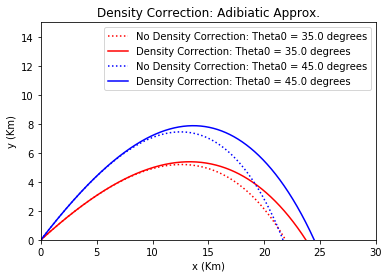

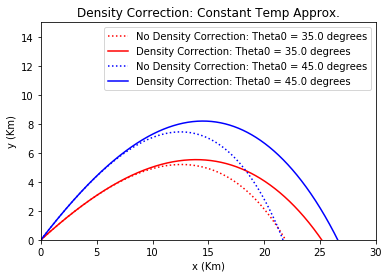

In [60]:
import numpy as np
from numpy import pi, sin, sqrt, cos,exp 
import matplotlib.pyplot as plt 

def fun4b(r,t,m):
    r = np.array(r)
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    b2 = 4e-5
    g = 9.81
    a = 6.5e-3
    t2 = sqrt(vx*vx + vy*vy)
    po = 1.275
    T0 = 300 #kelvin
    alpha = 2.5
    p = (1 - (a*y)/T0)**2.5
    
    f1 = vx
    f2 = vy
    f3 = - vx * b2*t2*p
    f4 = -g - vy*b2*t2*p
    return np.array([f1,f2,f3,f4])

def fun4a(r,t,m):
    r = np.array(r)
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    b2 = 4e-5
    g = 9.81
    t2 = sqrt(vx*vx + vy*vy)
    po = 1.275
    T0 = 300 #kelvin
    alpha = 2.5
    y0 = 10**4
    p = po*exp(-y/y0)
    
    f1 = vx
    f2 = vy
    f3 = - vx * b2*t2*(p/po)
    f4 = -g - vy*b2*t2*(p/po)
    return np.array([f1,f2,f3,f4])

def fun(r,t,m):
    r = np.array(r)
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    b2 = 4e-5
    g = 9.81
    t2 = sqrt(vx*vx + vy*vy)
    
    f1 = vx
    f2 = vy
    f3 = - vx * b2*t2
    f4 = -g - vy*b2*t2
    return np.array([f1,f2,f3,f4])

def Numerical_DE(fs,t0,tf,N,x0,y0,v0,theta0,m):
    
    
    h = (tf-t0)/N                               # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h)                   # creating the time steps
    r = np.empty((len(time),4),dtype = float)   # intializing x, y 
    
    r[0][0] = x0
    r[0][1] = y0
    r[0][2] = v0*cos(theta0*pi/180)
    r[0][3] = v0*sin(theta0*pi/180)
    
    for c,t in enumerate(time):                 
                                                                                            
        if c == N-1:
            break 
        else :
            k1 = h*fs(r[c,:],t,m)
            k2 = h*fs(r[c,:] + half*k1, t + half*h,m)
            k3 = h*fs(r[c,:] + half*k2, t + half*h,m)
            k4 = h*fs(r[c,:] + k3, t + h,m)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)

    
    
    xl = r[:,0]
    yl = r[:,1]
    
    
    '''
    plt.figure()
    plt.plot(xl,yl)
    plt.xlim(0,250)
    plt.ylim(0,100)
    plt.show()
    '''
    return xl, yl

# Choosing the initial conditions to plug in
theta0s = np.array([ 35.0, 45.0, ])
npoints = 10000
vi = 700
tf = 1000

# Initializing x,y positions that will later be used to plot

xs = np.empty([npoints,1])
ys = np.empty([npoints,1])

xs2 = np.empty([npoints,1])
ys2 = np.empty([npoints,1])

xs3 = np.empty([npoints,1])
ys3 = np.empty([npoints,1])

xs4 = np.empty([npoints,1])
ys4 = np.empty([npoints,1])


# Creating a Color list to help clarify plot

color = ['r','b']



# Plotting the Figures  - for the Adibiatic Case
plt.figure()
for i,t0 in enumerate(theta0s):
    t0tit = str(t0)
    xs,ys = Numerical_DE(fun,0,tf,npoints,0,0,vi,t0,1)
    xs2, ys2 = Numerical_DE(fun4b,0,tf,npoints,0,0,vi,t0,1)
    plt.plot(xs/1000,ys/1000, label = 'No Density Correction: Theta0 = ' + t0tit+' degrees', color = color[i], linestyle = ':')
    plt.plot(xs2/1000,ys2/1000,label = 'Density Correction: Theta0 = ' + t0tit+' degrees', color = color[i] )
plt.title('Density Correction: Adibiatic Approx.')
plt.xlabel('x (Km)')
plt.ylabel('y (Km)')
plt.ylim(0,15)
plt.xlim(0,30)
plt.legend()
plt.show()


# Plotting figures - Constant Temperature

plt.figure()
for i,t0 in enumerate(theta0s):
    t0tit = str(t0)
    xs3,ys3 = Numerical_DE(fun,0,tf,npoints,0,0,vi,t0,1)
    xs4, ys4 = Numerical_DE(fun4a,0,tf,npoints,0,0,vi,t0,1)
    plt.plot(xs3/1000,ys3/1000, label = 'No Density Correction: Theta0 = ' + t0tit+' degrees', color = color[i], linestyle = ':')
    plt.plot(xs4/1000,ys4/1000,label = 'Density Correction: Theta0 = ' + t0tit+' degrees', color = color[i] )
plt.title('Density Correction: Constant Temp Approx.')
plt.xlabel('x (Km)')
plt.ylabel('y (Km)')
plt.ylim(0,15)
plt.xlim(0,30)
plt.legend()
plt.show()




---

## Problem 6.5 - Baseball Motion

### Part A and Part B plots - No wind/Head Wind/Tail Wind

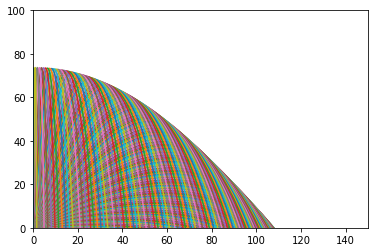

Angle of Farthest distance is 34.81005586592178 Max distance is 107.89615262648196


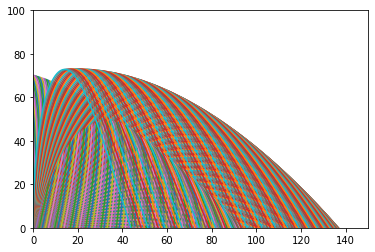

 Farthest distance for headwind  is 94.129 m and occurs when the initial angle is 27.849 degrees

 Farthest distance for tailwind  is 128.063 m and occurs when the initial angle is 44.754 degrees


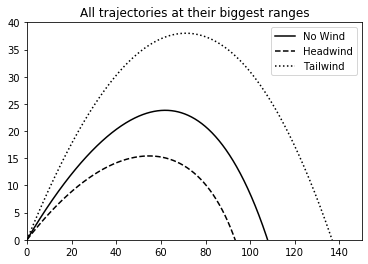

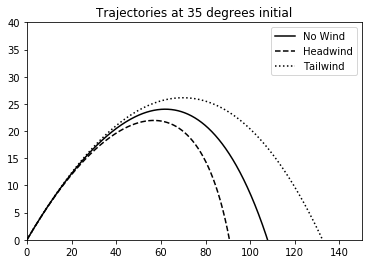

In [70]:
import numpy as np
from numpy import pi, sin, sqrt, cos,exp 
import matplotlib.pyplot as plt 


''''
The following functions define the formulas we are using to
find the trajectory
'''

def fun5a(r,t,m):
    r = np.array(r)
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    vd = 35
    delv = 5
    
    p0 = 1.275
    a = 6.5e-3
    alpha = 2.5
    T0 = 300
    
    p = p0*(1 - (a*y)/T0)**alpha
    
    b2x = .0039 + .0058/(1 + exp((vx - vd)/delv))
    b2y = .0039 + .0058/(1 + exp((vy - vd)/delv))
    
    
    g = 9.81
    t2 = sqrt(vx*vx + vy*vy)
    
    
    
    f1 = vx
    f2 = vy
    f3 = - vx * b2x*t2
    f4 = -g - vy* b2y * t2 
    return np.array([f1,f2,f3,f4])

def fun5bt(r,t,m):
    r = np.array(r)
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    vwind = 24*.447
    
    g = 9.81
   
    t2 = sqrt(((vx-vwind)**2 + vy*vy))
    
    p0 = 1.275
    a = 6.5e-3
    alpha = 2.5
    T0 = 300
    
    p = p0*(1 - (a*y)/T0)**alpha
    
    vd = 35
    delv = 5
    
    
    
    
    b2x = (.0039 + .0058/(1 + exp(((vx -vwind) - vd)/delv)))
    b2y = (.0039 + .0058/(1 + exp((vy - vd)/delv)))
    
    
    f1 = vx
    f2 = vy
    f3 = - (vx-vwind) * b2x * t2 
    f4 = -g - vy * b2y * t2
    
    return np.array([f1,f2,f3,f4])


def fun5bh(r,t,m):
    r = np.array(r)
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    
    g = 9.81
    vwind = 25*.447
    
    p0 = 1.275
    a = 6.5e-3
    alpha = 2.5
    T0 = 300
    
    p = p0*(1 - (a*y)/T0)**alpha
    t2 = sqrt(((vx + vwind)**2 + vy*vy))
    vd = 35
    delv = 5
    
    
    
    
    b2x = (.0039 + .0058/(1 + exp(((vx + vwind) - vd)/delv)))
    b2y = (.0039 + .0058/(1 + exp((vy - vd)/delv)))
    
    
    
    
    f1 = vx
    f2 = vy
    f3 = - (vx + vwind) * b2x * t2
    f4 = -g - vy * b2y * t2 
    return np.array([f1,f2,f3,f4])


def Numerical_DE(fs,t0,tf,N,x0,y0,v0,theta0,m):
    
    
    h = (tf-t0)/N                               # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h)                   # creating the time steps
    r = np.empty((len(time),4),dtype = float)   # intializing x, y 
    
    r[0][0] = x0
    r[0][1] = y0
    r[0][2] = v0*cos(theta0*pi/180)
    r[0][3] = v0*sin(theta0*pi/180)
    
    for c,t in enumerate(time):                 # to animate - go through this for loop to get the updated pos/velocity 
                                                                                            
        if c == N-1:
            break 
        else :
            k1 = h*fs(r[c,:],t,m)
            k2 = h*fs(r[c,:] + half*k1, t + half*h,m)
            k3 = h*fs(r[c,:] + half*k2, t + half*h,m)
            k4 = h*fs(r[c,:] + k3, t + h,m)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)

    
    
    xl = r[:,0]
    yl = r[:,1]
    
    
    '''
    plt.figure()
    plt.plot(xl,yl)
    plt.xlim(0,250)
    plt.ylim(0,100)
    plt.show()
    '''
    return xl, yl

# Choosing the initial conditions to plug in
theta0s = np.linspace(1,90,180)
npoints = 1000
vi = 49
tf = 8

xdistances1 = np.empty([len(theta0s),2]) # first column will be range, second will be angle
r = 0.0    
r2 = 0.0
r3 = 0.0                             # Initializing r, range - these will be elments of column 1

xdistances2 = np.empty([len(theta0s),2])
xdistances3 = np.empty([len(theta0s),2])

# Initializing x,y positions that will later be used to plot

xs = np.empty([npoints,1])
ys = np.empty([npoints,1])

xs2 = np.empty([npoints,1])
ys2 = np.empty([npoints,1])


xs3 = np.empty([npoints,1])
ys3 = np.empty([npoints,1])



# Finding theta0 that gives maximum range - With no Change head/tail wind
plt.figure()
for i, t0 in enumerate(theta0s):
    xs,ys = Numerical_DE(fun5a,0,tf,npoints,0,0,vi,t0,1)
    plt.plot(xs,ys)
    
    for k,y in enumerate(ys):
        if y > -1e-1 and y < 1e-1 and xs[k] > 0.0:
            r = xs[k]
    xdistances1[i,:] = np.array([r,t0])
    
plt.ylim(0,100)
plt.xlim(0,150)
plt.show()

print('Angle of Farthest distance is',xdistances1[np.argmax(xdistances1[:,0]),1], 'Max distance is',xdistances1[np.argmax(xdistances1[:,0]),0])
    

# Finding Theta0 that gives max range with Head/Tail wind

plt.figure()
for i2, t02 in enumerate(theta0s):
    
    
    xs2,ys2 = Numerical_DE(fun5bh,0,tf,npoints,0,0,vi,t02,1)
    
    xs3, ys3 = Numerical_DE(fun5bt,0,tf,npoints,0,0,vi,t02,1)
    
    
    plt.plot(xs2,ys2)
    plt.plot(xs3,ys3)
    
    
    for k2,y2 in enumerate(ys2):
        if y2 > -1.0 and y2 < 1.0 and xs2[k2] > 0.0:
            r2 = xs2[k2]
    xdistances2[i2,:] = np.array([r2,t02])
    
    
    for k3,y3 in enumerate(ys2):
        if y3 > -1.0 and y3 < 1.0 and xs3[k3] > 0.0:
            r3 = xs3[k3]
    
    xdistances3[i2,:] = np.array([r3,t02])
        
    
    
plt.ylim(0,100)
plt.xlim(0,150)
plt.show()


print(' Farthest distance for headwind  is', np.around(xdistances2[np.argmax(xdistances2[:,0]),0],3),'m and occurs when the initial angle is',np.around(xdistances2[np.argmax(xdistances2[:,0]),1],3),'degrees')
print('')
print(' Farthest distance for tailwind  is', np.around(xdistances3[np.argmax(xdistances3[:,0]),0],3),'m and occurs when the initial angle is',np.around(xdistances3[np.argmax(xdistances3[:,0]),1],3),'degrees')

# Plotting Furthests on the same plot
farnonex, farnoney = Numerical_DE(fun5a,0,tf,npoints,0,0,vi,34.81,1)
farheadx, farheady = Numerical_DE(fun5bh,0,tf,npoints,0,0,vi,27.85,1)
fartailx, fartaily = Numerical_DE(fun5bt,0,tf,npoints,0,0,vi,44.75,1)


plt.figure()

plt.plot(farnonex, farnoney, label = 'No Wind', color = 'k')
plt.plot(farheadx, farheady, label = 'Headwind', linestyle = 'dashed', color = 'k')
plt.plot(fartailx, fartaily, label = 'Tailwind', linestyle = 'dotted', color = 'k')

plt.xlim(0,150)
plt.ylim(0,40)
plt.legend()
plt.title('All trajectories at their biggest ranges')
plt.show()

# Plotting all of them at 35 degrees thetai
nonex, noney = Numerical_DE(fun5a,0,tf,npoints,0,0,vi,35,1)
headx, heady = Numerical_DE(fun5bh,0,tf,npoints,0,0,vi,35,1)
tailx, taily = Numerical_DE(fun5bt,0,tf,npoints,0,0,vi,35,1)

plt.figure()

plt.plot(nonex, noney, label = 'No Wind', color = 'k')
plt.plot(headx, heady, label = 'Headwind', linestyle = 'dashed', color = 'k')
plt.plot(tailx, taily, label = 'Tailwind', linestyle = 'dotted', color = 'k')
plt.legend()
plt.xlim(0,150)
plt.ylim(0,40)
plt.title("Trajectories at 35 degrees initial")

plt.show()



Note - a little different because the crosswind magnitude here is larger

## Part C - Velocities at the mound

Assume launch at an angle of -7 degrees average for MLB https://community.hsbaseballweb.com/topic/pitch-angle-and-swing-angle-mound-vs-flat-vs-machine 
y0 = 2m  
xf = 18.44meters

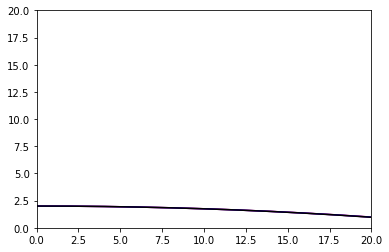

End Velocity - No wind 41.00056813304634 m/s
End Velocity - Tail Wind 41.50753904493894 m/s
End Velocity - Head Wind 39.845087052443056 m/s


In [30]:
import numpy as np
from numpy import pi, sin, sqrt, cos,exp 
import matplotlib.pyplot as plt 

def fun5a(r,t,m):
    r = np.array(r)
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    vd = 35
    delv = 5
    
    p0 = 1.275
    a = 6.5e-3
    alpha = 2.5
    T0 = 300
    
    p = p0*(1 - (a*y)/T0)**alpha
    
    b2x = .0039 + .0058/(1 + exp((vx - vd)/delv))
    b2y = .0039 + .0058/(1 + exp((vy - vd)/delv))
    
    
    g = 9.81
    t2 = sqrt(vx*vx + vy*vy)
    
    
    
    f1 = vx
    f2 = vy
    f3 = - vx * b2x*t2
    f4 = -g - vy* b2y * t2 
    return np.array([f1,f2,f3,f4])

def fun5bt(r,t,m):
    r = np.array(r)
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    vwind = 24*.447
    
    g = 9.81
   
    t2 = sqrt(((vx-vwind)**2 + vy*vy))
    
    p0 = 1.275
    a = 6.5e-3
    alpha = 2.5
    T0 = 300
    
    p = p0*(1 - (a*y)/T0)**alpha
    
    vd = 35
    delv = 5
    
    
    
    
    b2x = (.0039 + .0058/(1 + exp(((vx -vwind) - vd)/delv)))
    b2y = (.0039 + .0058/(1 + exp((vy - vd)/delv)))
    
    
    f1 = vx
    f2 = vy
    f3 = - (vx-vwind) * b2x * t2 
    f4 = -g - vy * b2y * t2
    
    return np.array([f1,f2,f3,f4])


def fun5bh(r,t,m):
    r = np.array(r)
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    
    g = 9.81
    vwind = 25*.447
    
    p0 = 1.275
    a = 6.5e-3
    alpha = 2.5
    T0 = 300
    
    p = p0*(1 - (a*y)/T0)**alpha
    t2 = sqrt(((vx + vwind)**2 + vy*vy))
    vd = 35
    delv = 5
    
    
    
    
    b2x = (.0039 + .0058/(1 + exp(((vx + vwind) - vd)/delv)))
    b2y = (.0039 + .0058/(1 + exp((vy - vd)/delv)))
    
    
    
    
    f1 = vx
    f2 = vy
    f3 = - (vx + vwind) * b2x * t2
    f4 = -g - vy * b2y * t2 
    return np.array([f1,f2,f3,f4])


def Numerical_DE(fs,t0,tf,N,x0,y0,v0,theta0,m):
    
    
    h = (tf-t0)/N                               # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h)                   # creating the time steps
    r = np.empty((len(time),4),dtype = float)   # intializing x, y 
    
    r[0][0] = x0
    r[0][1] = y0
    r[0][2] = v0*cos(theta0*pi/180)
    r[0][3] = v0*sin(theta0*pi/180)
    
    for c,t in enumerate(time):                 # to animate - go through this for loop to get the updated pos/velocity 
                                                                                            
        if c == N-1:
            break 
        else :
            k1 = h*fs(r[c,:],t,m)
            k2 = h*fs(r[c,:] + half*k1, t + half*h,m)
            k3 = h*fs(r[c,:] + half*k2, t + half*h,m)
            k4 = h*fs(r[c,:] + k3, t + h,m)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)

    
    
    xl = r[:,0]
    yl = r[:,1]
    
    vx = r[:,2]
    vy = r[:,3]
    
    
    
    '''
    plt.figure()

    plt.plot(xl,yl)
    plt.xlim(0,250)
    plt.ylim(0,100)

    plt.show()
    '''
    return xl, yl, vx, vy

# Find final velocity 
npoints = 10000
y0 = 2
theta0 = 0
v0 = 44.704

    
x1, y1, vx1, vy1 = Numerical_DE(fun5a,0,5,npoints,0,y0,v0,theta0,0)
x2, y2, vx2, vy2 = Numerical_DE(fun5bt,0,5,npoints,0,y0,v0,theta0,0)
x3, y3, vx3, vy3 = Numerical_DE(fun5bh,0,5,npoints,0,y0,v0,theta0,0)

plt.figure()
plt.plot(x1,y1, c = 'r')
plt.plot(x2,y2, c = 'b')
plt.plot(x3,y3, c = 'k')
plt.ylim(0,20)
plt.xlim(0,20)
plt.show()

for k,x in enumerate(x1):
    if x >=  18.44:
        print('End Velocity - No wind',sqrt(vx1[k]**2 + vy1[k]**2),'m/s')
        break
for i,xx in enumerate(x2):
    if xx >=  18.44:
        print('End Velocity - Tail Wind',sqrt(vx2[i]**2 + vy2[i]**2), 'm/s')
        break
for j, xxx in enumerate(x3):
    if xxx >= 18.44:
        print('End Velocity - Head Wind', sqrt(vx3[j]**2 + vy3[j]**2),'m/s')
        break

Note - All the trajectories are here, but on such a small scale they are about the same

---

## Problem 6.6 - The Crosswind 

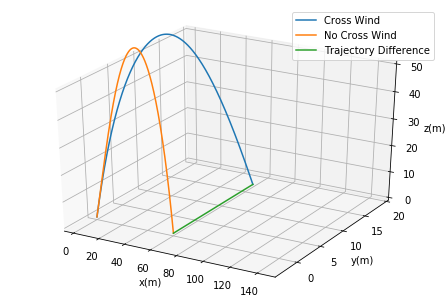

Difference of Trajectory With a Cross wind and Without
16.723585149589407 meters


In [34]:
import numpy as np
from numpy import pi, sin, sqrt, cos,exp 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

def fun6(r,t,m):
    r = np.array(r)
    x = r[0]
    y = r[1]
    z = r[2]
    vx = r[3]
    vy = r[4]
    vz = r[5]
    
    vd = 35
    delv = 5
    
    p0 = 1.275
    a = 6.5e-3
    alpha = 2.5
    T0 = 300
    
    p = p0*(1 - (a*y)/T0)**alpha
    
    vwind = 4.470 # in y direction
    
    b2x = .0039 + .0058/(1 + exp((vx - vd)/delv))
    b2y = .0039 + .0058/(1 + exp((vy - vd)/delv))
    b2z = .0039 + .0058/(1 + exp((vz - vd)/delv))
    
    
    g = 9.81
    
    t2 = sqrt(vx**2 + vy**2 + vz**2)
    
    
    
    f1 = vx
    f2 = vy
    f3 = vz
    f4 = - vx * b2x * t2
    f5 = - vy  * b2y * t2
    f6 = -g - vz * b2z * t2 
    
    return np.array([f1,f2,f3,f4,f5,f6])
def fun6_air(r,t,m):
    r = np.array(r)
    x = r[0]
    y = r[1]
    z = r[2]
    vx = r[3]
    vy = r[4]
    vz = r[5]
    
    vd = 35
    delv = 5
    
    p0 = 1.275
    a = 6.5e-3
    alpha = 2.5
    T0 = 300
    
    p = p0*(1 - (a*y)/T0)**alpha
    
    vwind = 4.470 # in y direction
    
    b2x = .0039 + .0058/(1 + exp((vx - vd)/delv))
    b2y = .0039 + .0058/(1 + exp(((vy - vwind) - vd)/delv))
    b2z = .0039 + .0058/(1 + exp((vz - vd)/delv))
    
    
    g = 9.81
    
    t2 = sqrt(vx**2 + (vy - vwind)**2 + vz**2)
    
    
    
    f1 = vx
    f2 = vy
    f3 = vz
    f4 = - vx * b2x * t2
    f5 = - (vy - vwind) * b2y * t2
    f6 = -g - vz * b2z * t2 
    
    return np.array([f1,f2,f3,f4,f5,f6])

def Numerical_DEz(fs,t0,tf,N,x0,y0,z0,v0,theta0,m):
    
    
    h = (tf-t0)/N                               # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h)                   # creating the time steps
    r = np.empty((len(time),6),dtype = float)   # intializing x, y 
    
    r[0][0] = x0
    r[0][1] = y0
    r[0][2] = z0
    r[0][3] = v0*cos(theta0*pi/180)
    r[0][4] = 0.0
    r[0][5] = v0*sin(theta0*pi/180)
    
    for c,t in enumerate(time):                 # to animate - go through this for loop to get the updated pos/velocity 
                                                                                            
        if c == N-1:
            break 
        else :
            k1 = h*fs(r[c,:],t,m)
            k2 = h*fs(r[c,:] + half*k1, t + half*h,m)
            k3 = h*fs(r[c,:] + half*k2, t + half*h,m)
            k4 = h*fs(r[c,:] + k3, t + h,m)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)

    
    
    xl = r[:,0]
    yl = r[:,1]
    zl = r[:,2]
    
    
    '''
    plt.figure()
    plt.plot(xl,yl)
    plt.xlim(0,250)
    plt.ylim(0,100)
    plt.show()
    '''
    return xl, yl, zl 

tf = 10 
Npoints = 10000
x0 = y0 = z0 = 0
theta0 = 70
v0 = 49 

x, y, z = Numerical_DEz(fun6_air,0,tf,Npoints,x0,y0,z0,v0,theta0,0.0)
xx, yy, zz = Numerical_DEz(fun6,0,tf,Npoints,x0,y0,z0,v0,theta0,0.0)

#Cutting of Specific values
xn = []
yn = []
zn = []
xn2 = []
yn2 =[] 
zn2 = []
for i,zk in enumerate(z):
    xn.append(x[i])
    yn.append(y[i])
    zn.append(zk)
    if zk < 1e-2 and zk > -1e-2 and x[i] > 30:
        xn = np.array(xn)
        yn = np.array(yn)
        zn = np.array(zn)
        break

for j, zt in enumerate(zz):
    xn2.append(xx[j])
    yn2.append(yy[j])
    zn2.append(zt)
    if zt< 1e-2 and zt > -1e-2 and xx[j] > 20:
        xn2 = np.array(xn2)
        yn2 = np.array(yn2)
        zn2 = np.array(zn2)
        break
    

x, y, z = xn, yn, zn
xx, yy, zz = xn2, yn2, zn2
        
traject_difference = sqrt((xx[-1] - x[-1])**2 + (yy[-1] -y[-1] )**2)        
        

fig = plt.figure()

ax = Axes3D(fig)
ax.plot(xs = x,ys = y,zs = z, label = 'Cross Wind')
ax.plot(xs = xx, ys = yy, zs = zz ,label = 'No Cross Wind')
ax.plot(xs = [xx[-1],x[-1]], ys = [yy[-1],y[-1]], label = 'Trajectory Difference')
ax.set_zlim(0,50)
ax.set_xlabel('x(m)')
ax.set_ylabel('y(m)')
ax.set_zlabel('z(m)')
plt.xlim(-4,150)
plt.ylim(-4,20)
# ax.zlim(0,150)
ax.legend()
plt.show()

print('Difference of Trajectory With a Cross wind and Without')
print(traject_difference,'meters')

---

## Problem 6.7 - Golfing 

206.05126016866572
6.0
Max Range is 206.051 and occurs when the initial angle is 6.0


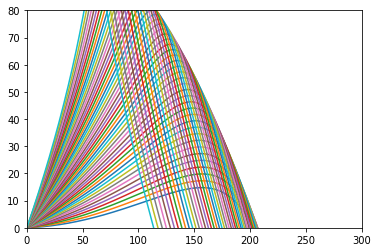

In [2]:
from numpy import exp , sqrt, pi, sin, cos 
import numpy as np
import matplotlib.pyplot as plt

def f(v,t):
    vx = v[0]
    vy = v[1]
    vmag = sqrt(vx**2 + vy**2)
    
    # Finding the value to use for C in drage force 
    c=.5
    if abs(vmag) <= 14:
        c = .5
    else:
        c = 7./vmag
        
        
    # Listing the constants
                   
    p0 = 1.275                  # Air density 
    A = .0014228              # Cross-Section Area
    m = (.046)              # mass of ball in kg
    g = 9.807                  # gravity 
    
    # Equations of motion 
    
    f1 = -c * p0 * A * vx * (vmag)/m - 1.*.25 * vy 
    f2 = -c * p0 * A * vy * (vmag)/m + 1.*.25 * vx   - g
    
    # Returning the values of the equations of motions
    return np.array([f1,f2])





def Euler_Method(function1,N,t0, tf,v0, theta0):
    
    h = (tf - t0)/N
    time = np.arange(t0,tf,h)
    vp = np.zeros([len(time),2])
    xp = np.zeros([len(time),2])
    
    
    vx0 = v0*cos(theta0*pi/180)
    vy0 = v0*sin(theta0*pi/180)
    
    x0, y0 = 0.0, 0.0
    
    v = np.array([vx0, vy0])
    x = np.array([x0 , y0])
    
    for i, t in enumerate(time): 
        
        
        
        vp[i,:] = v
        xp[i,:] = x 
        
        v += (h)*function1(v,t)
        x +=  v*h  - h**2*function1(v,t)*.5
        
        
        
    rng = 0.0
    for i,y in enumerate(xp[:,1]):
        x = xp[i,0]
        
        if y < 1 and y > -1e-1 and x > 75 :
            rng = x
            break
        
            
            
        
        
        
        
        
        
        
        
        
        
            
    '''
    vtit = str(v0)
    plt.figure()
    plt.title('Velocity vs Time, v0 = '+vtit)
    plt.plot(time,vp)
    plt.show()
    '''
    return time, vp, xp, rng

# Argument values 
ti = 0.000 
tf = 17

v0 = 70
npoints = 10000
thetis = np.linspace(1,50,50)

# list of range values 
rangpoints = np.zeros([len(thetis),2])

plt.figure()
for i,thet in enumerate(thetis):
    t , vps, pos, r = Euler_Method(f,npoints, ti,tf, v0,thet)
    xs = pos[:,0]
    ys = pos[:,1]
    plt.plot(xs, ys)
    
    
    rangpoints[i ,:] = np.array([r,thet])
    
plt.xlim(0,300)
plt.ylim(0,80)


maxrange = rangpoints[np.argmax(rangpoints[:,0])][0]
print(maxrange)
thetamax = rangpoints[np.argmax(rangpoints[:,0]),1]
print(thetamax)

maxr = str(np.around(maxrange,3))
ther = str(np.around(thetamax,3))

print('Max Range is ' + maxr + ' and occurs when the initial angle is ' + ther)



Honestly, I do not belive it is 6 degrees, but that's what it keeps coming out as

### Part B - Recreating the graph

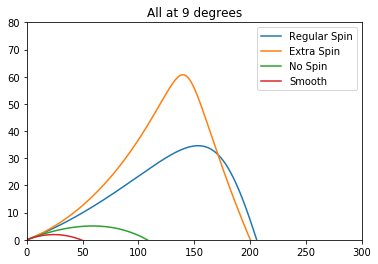

In [19]:
'''
Part  b - recreating the figure - 
'''
def fmoreback(v,t):
    vx = v[0]
    vy = v[1]
    vmag = sqrt(vx**2 + vy**2)
    
    # Finding the value to use for C in drage force 
    c=.5
    if abs(vmag) <= 14:
        c = .5
    else:
        c = 7./vmag
        
        
    # Listing the constants
                   
    p0 = 1.275                  # Air density 
    A = .00142287              # Cross-Section Area
    m = (.04593)              # mass of ball in kg
    g = 9.81                  # gravity 
    
    # Equations of motion 
    
    f1 = -c * p0 * A * vx * (vmag)/m - 1.*1.5*.25 * vy 
    f2 = -c * p0 * A * vy * (vmag)/m + 1.*1.5*.25 * vx   - g
    
    # Returning the values of the equations of motions
    return np.array([f1,f2])

def fnospin(v,t):
    vx = v[0]
    vy = v[1]
    vmag = sqrt(vx**2 + vy**2)
    
    # Finding the value to use for C in drage force 
    c=.5
    if abs(vmag) <= 14:
        c = .5
    else:
        c = 7./vmag
        
        
    # Listing the constants
                   
    p0 = 1.275                  # Air density 
    A = .00142287              # Cross-Section Area
    m = (.04593)              # mass of ball in kg
    g = 9.81                  # gravity 
    
    # Equations of motion 
    
    f1 = -c * p0 * A * vx * (vmag)/m - 1.*0*.25 * vy 
    f2 = -c * p0 * A * vy * (vmag)/m + 1.*0*.25 * vx   - g
    return np.array([f1,f2])

def fnodimpts(v,t):
    vx = v[0]
    vy = v[1]
    vmag = sqrt(vx**2 + vy**2)
    
    # Finding the value to use for C in drage force 
    
        
    # Listing the constants
    vd = 35
    delv = 5
            
    m = (.04593)              # mass of ball in kg
    g = 9.807                  # gravity 
    
    b2x = .0039 + .0058/(1 + exp((vx - vd)/delv))
    b2y = .0039 + .0058/(1 + exp((vy - vd)/delv))
    # Equations of motion 
    
    f1 = -vx * b2x * vmag - .25 * vy 
    f2 = - g - vy * b2y * vmag -.25 * vx   
    return np.array([f1,f2])

normt, normalvs, normalxs, ragx = Euler_Method(f,npoints, ti,tf, v0,9)
ext, exvs, exxs, ragex = Euler_Method(fmoreback,npoints, ti,tf, v0,9)
nospt, nospvs, nospxs, ragnosp = Euler_Method(fnospin,npoints, ti,tf, v0,9)
smootht, smoothvs,smoothxs, ragsmooth = Euler_Method(fnodimpts,npoints, ti,tf, v0,9)

plt.figure()

plt.plot(normalxs[:,0],normalxs[:,1], label = 'Regular Spin')
plt.plot(exxs[:,0],exxs[:,1], label = 'Extra Spin')
plt.plot(nospxs[:,0],nospxs[:,1], label = 'No Spin')
plt.plot(smoothxs[:,0],smoothxs[:,1], label = 'Smooth')
plt.legend()
plt.xlim(0,300)
plt.ylim(0,80)
plt.title('All at 9 degrees')
plt.show()
